<a href="https://colab.research.google.com/github/NidhinWiz/UsedCarsPricePrediction/blob/main/UsedCarsPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAR PRICE PREDICTION**

![link text](https://www.topgear.com/sites/default/files/cars-car/image/2016/08/rh_huayrabc-67.jpg)

**Car Price Prediction Model – Project Description:
This project involves building a machine learning model to predict the price of a car based on various features such as brand, model, year, mileage, fuel type, transmission, engine capacity, and other relevant specifications. The primary objective is to assist buyers and sellers in estimating a fair market value for used cars.**

**DATA LOADING**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data=pd.read_csv('/content/cardekho.csv')
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [ ]:
data.duplicated().sum()

np.int64(1202)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),208
engine,208


In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum().mean()*100

np.float64(0.0)

**CHECKING OUTLIERS**

In [ ]:
data.describe()

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,6718.000000,6.718000e+03,6.718000e+03,6718.00000,6718.000000,6718.000000
mean,2013.609110,5.263196e+05,7.340230e+04,19.46531,1430.891337,5.434653
std,3.900648,5.235398e+05,5.869980e+04,4.04915,493.493277,0.984230
min,1994.000000,2.999900e+04,1.000000e+00,0.00000,624.000000,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,16.80000,1197.000000,5.000000
50%,2014.000000,4.200000e+05,6.822150e+04,19.44000,1248.000000,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,22.50000,1498.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.00000,3604.000000,14.000000


In [ ]:
nu=data.select_dtypes(include=["number"])
nu

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
0,2014,450000,145500,23.40,1248.0,5.0
1,2014,370000,120000,21.14,1498.0,5.0
2,2006,158000,140000,17.70,1497.0,5.0
3,2010,225000,127000,23.00,1396.0,5.0
4,2007,130000,120000,16.10,1298.0,5.0
...,...,...,...,...,...,...
8121,2013,260000,50000,18.90,998.0,5.0
8122,2014,475000,80000,22.54,1396.0,5.0
8123,2013,320000,110000,18.50,1197.0,5.0
8124,2007,135000,119000,16.80,1493.0,5.0


In [ ]:
nu.skew()

,0
year,-0.933778
selling_price,5.570562
km_driven,11.916338
mileage(km/ltr/kg),-0.167529
engine,1.215629
seats,1.918020


<Axes: >

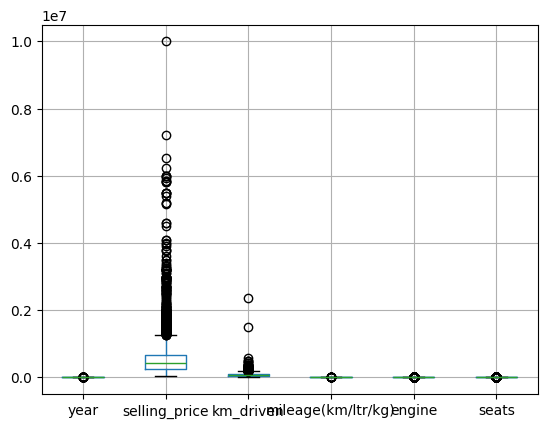

In [ ]:
nu.boxplot()

In [ ]:
import pandas as pd

# Step 1: Select numeric columns only
numeric_cols = data.select_dtypes(include='number').columns

# Step 2: Loop through each numeric column
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace values below lower bound
    data[col] = data[col].apply(lambda x: lower_bound if x < lower_bound else x)

    # Replace values above upper bound
    data[col] = data[col].apply(lambda x: upper_bound if x > upper_bound else x)

print("Outliers replaced with bounds.")

Outliers replaced with bounds.


/tmp/ipython-input-49-1176015696.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(lambda x: lower_bound if x < lower_bound else x)
/tmp/ipython-input-49-1176015696.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].apply(lambda x: upper_bound if x > upper_bound else x)
/tmp/ipython-input-49-1176015696.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

<Axes: >

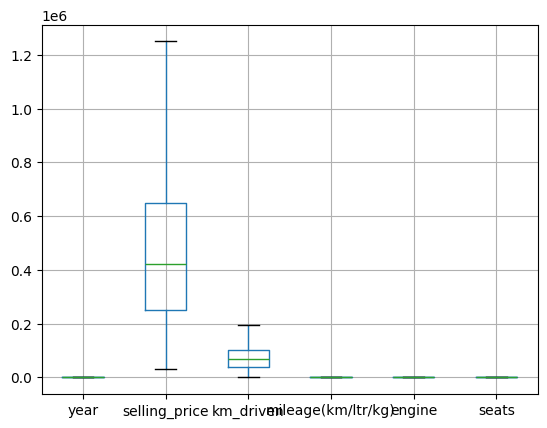

In [ ]:
nu=data.select_dtypes(include=["number"])
nu.boxplot()

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'selling_price'}>],
       [<Axes: title={'center': 'km_driven'}>,
        <Axes: title={'center': 'mileage(km/ltr/kg)'}>],
       [<Axes: title={'center': 'engine'}>,
        <Axes: title={'center': 'seats'}>]], dtype=object)

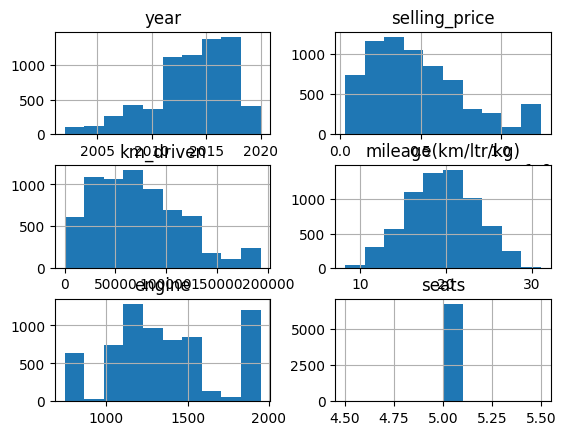

In [ ]:
nu.hist()

**VISUALIZATION**

In [ ]:
data=pd.get_dummies(data,columns=['owner','fuel','seller_type','transmission'],drop_first=True)

In [ ]:

data.head()

,name,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,23.40,1248.0,74,5.0,False,False,False,False,True,False,False,True,False,True
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,21.14,1498.0,103.52,5.0,False,True,False,False,True,False,False,True,False,True
2,Honda City 2017-2020 EXi,2006.0,158000.0,140000.0,17.70,1497.0,78,5.0,False,False,False,True,False,False,True,True,False,True
3,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,23.00,1396.0,90,5.0,False,False,False,False,True,False,False,True,False,True
4,Maruti Swift VXI BSIII,2007.0,130000.0,120000.0,16.10,1298.0,88.2,5.0,False,False,False,False,False,False,True,True,False,True


# **HEAT MAP**

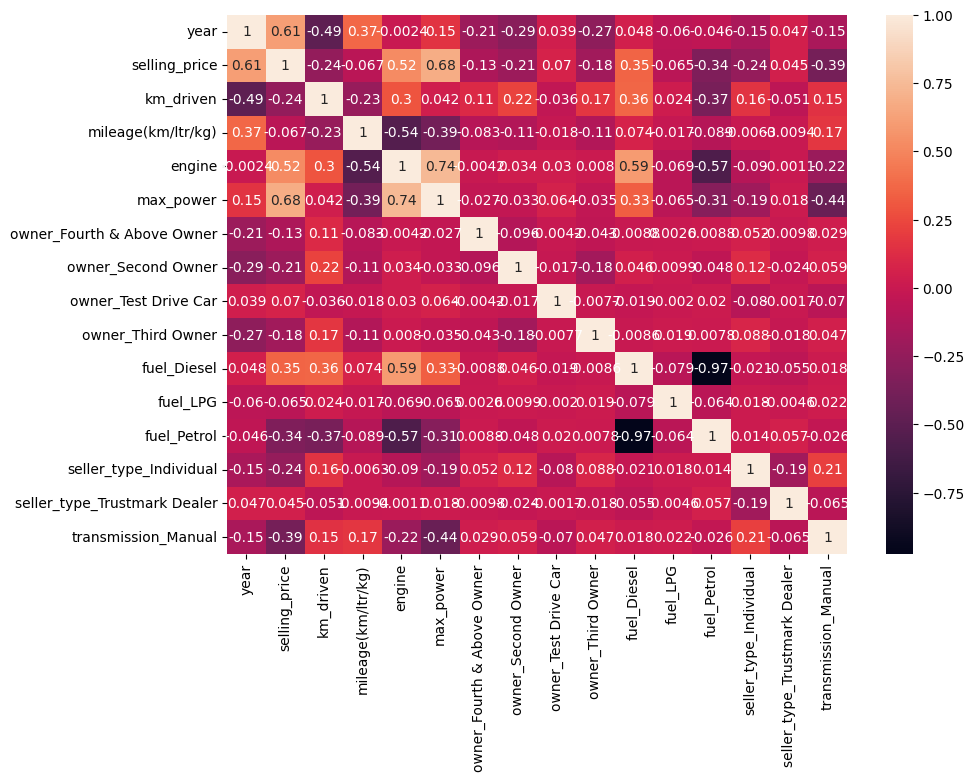

In [ ]:
data['max_power'] = pd.to_numeric(data['max_power'], errors='coerce')
data.dropna(inplace=True)
plt.figure(figsize=(10,7))
sns.heatmap(data.drop(['name','seats'],axis=1).corr(),annot=True)
plt.show()

# **LINEPLOT**

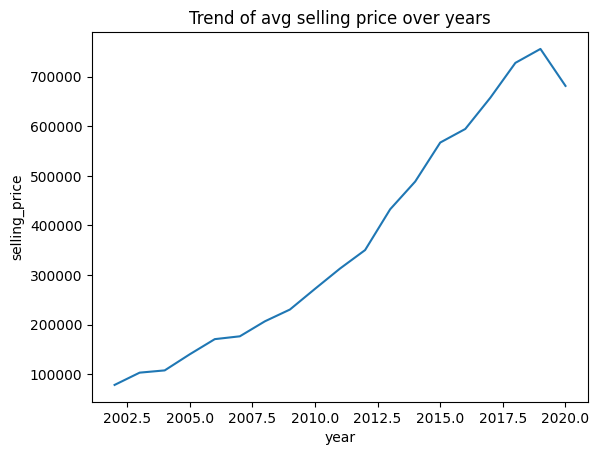

In [ ]:
yearly_avg=data.groupby('year')['selling_price'].mean().reset_index()
sns.lineplot(x='year',y='selling_price',data=yearly_avg)
plt.title("Trend of avg selling price over years")
plt.show()

# **SCATTER PLOT**

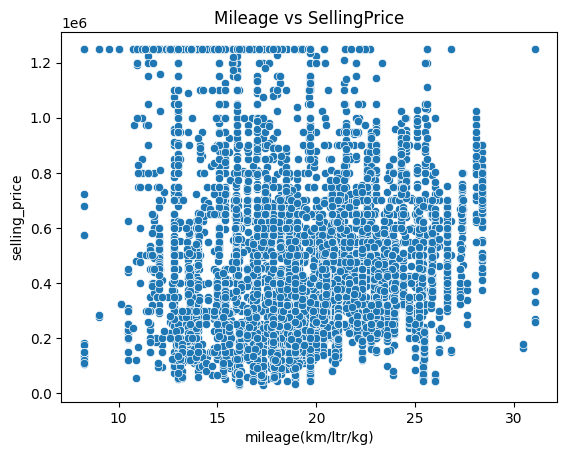

In [ ]:
sns.scatterplot(x='mileage(km/ltr/kg)',y='selling_price',data=data)
plt.title('Mileage vs SellingPrice')
plt.show()

# **PAIR PLOT**

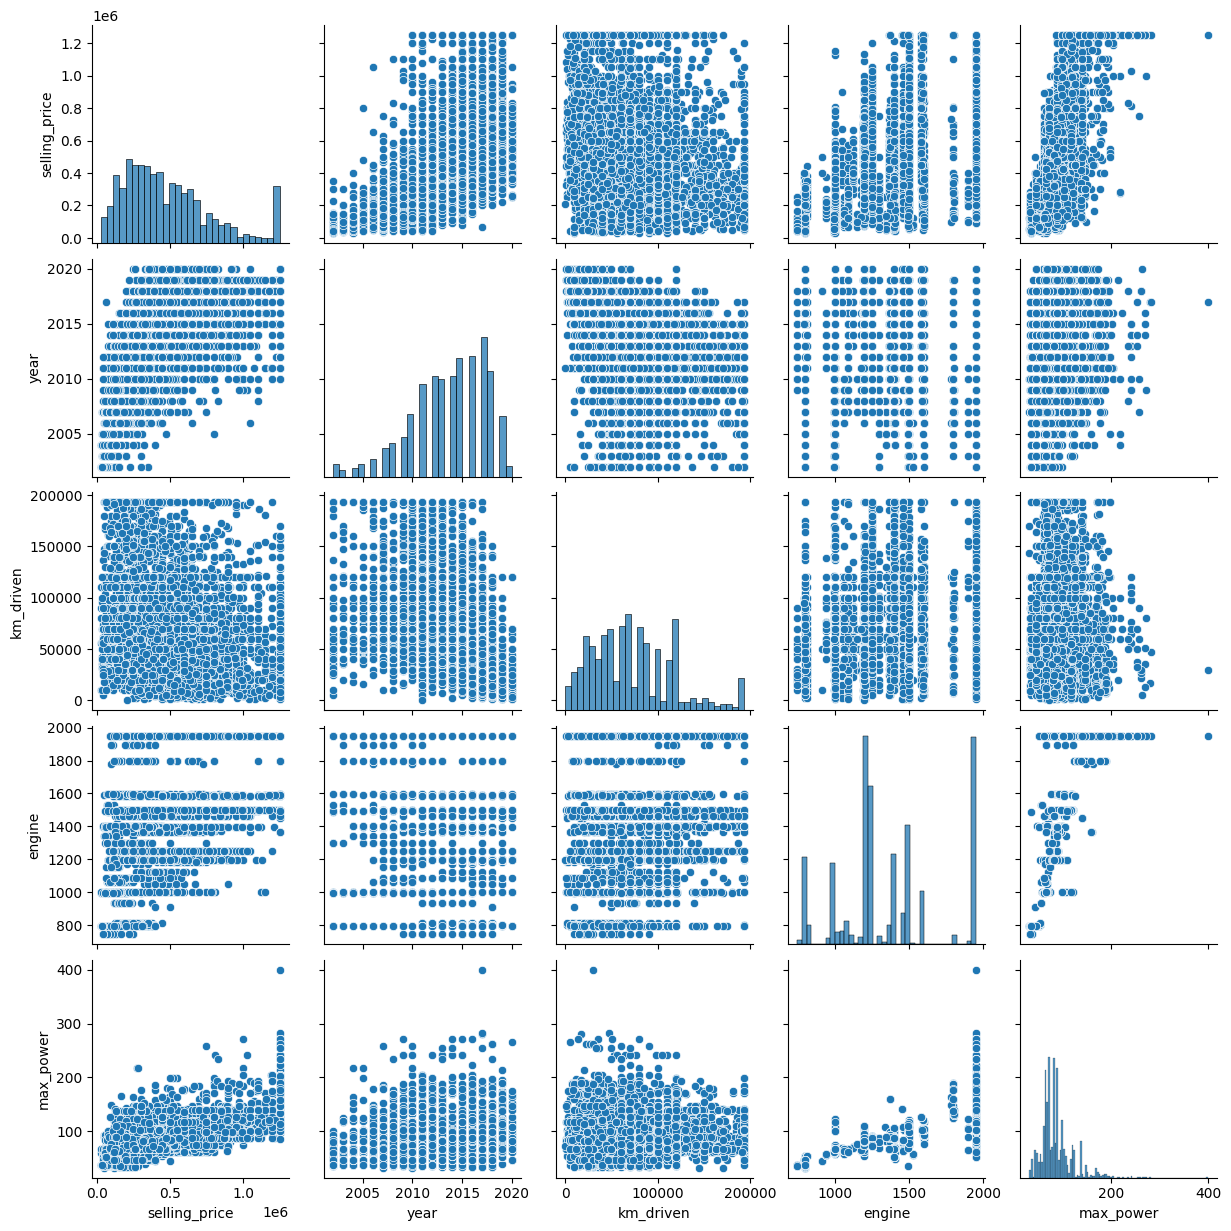

In [ ]:
sns.pairplot(data[['selling_price','year','km_driven','engine','max_power']])
plt.show()

**MACHINE LEARNING**

**LINEAR REGRESSION**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          6717 non-null   object 
 1   year                          6717 non-null   float64
 2   selling_price                 6717 non-null   float64
 3   km_driven                     6717 non-null   float64
 4   mileage(km/ltr/kg)            6717 non-null   float64
 5   engine                        6717 non-null   float64
 6   max_power                     6717 non-null   float64
 7   seats                         6717 non-null   float64
 8   owner_Fourth & Above Owner    6717 non-null   bool   
 9   owner_Second Owner            6717 non-null   bool   
 10  owner_Test Drive Car          6717 non-null   bool   
 11  owner_Third Owner             6717 non-null   bool   
 12  fuel_Diesel                   6717 non-null   bool   
 13  fuel_LPG

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()
data['name'] = label_encoder.fit_transform(data['name'])


In [ ]:
data.head()

,name,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,1249,2014.0,450000.0,145500.0,23.40,1248.0,74.00,5.0,False,False,False,False,True,False,False,True,False,True
1,1546,2014.0,370000.0,120000.0,21.14,1498.0,103.52,5.0,False,True,False,False,True,False,False,True,False,True
2,375,2006.0,158000.0,140000.0,17.70,1497.0,78.00,5.0,False,False,False,True,False,False,True,True,False,True
3,743,2010.0,225000.0,127000.0,23.00,1396.0,90.00,5.0,False,False,False,False,True,False,False,True,False,True
4,1290,2007.0,130000.0,120000.0,16.10,1298.0,88.20,5.0,False,False,False,False,False,False,True,True,False,True


In [ ]:
x=data.drop(['selling_price','name'],axis=1)
y=data['selling_price']

In [ ]:
x.shape

(6717, 16)

In [ ]:
y.shape

(6717,)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
x_test.shape,x_train.shape,y_test.shape,y_train.shape

((2016, 16), (4701, 16), (2016,), (4701,))

In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
print('MAE:',(mean_absolute_error(pred,y_test)))
print('MSE:',(mean_squared_error(pred,y_test)))
print('R2 score:',(r2_score(pred,y_test)))

MAE: 111604.42322043491
MSE: 21132980470.56991
R2 score: 0.6905297264836714


**DECISIONTREE**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

print("\n🔍 Decision Tree Regression")
print("R² Score (Accuracy):", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))



🔍 Decision Tree Regression
R² Score (Accuracy): 0.8487690775753092
MSE: 13767206662.469385
MAE: 77616.13182043651


**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print("\n🔍 Random Forest Regression")
print("R² Score (Accuracy):", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


🔍 Random Forest Regression
R² Score (Accuracy): 0.9034847223073356
MSE: 8786204254.901737
MAE: 62741.20317008468


**XGB REGRESSOR**

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

print("\n🔍 XGBoost Regression")
print("R² Score (Accuracy):", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


🔍 XGBoost Regression
R² Score (Accuracy): 0.9121398455859808
MSE: 7998290850.97737
MAE: 61869.986023918034


# **MODEL ACCURACY COMPARISON**

In [ ]:
import pandas as pd

# Collect results
results = [
    ["Linear Regression", r2_score(y_test, model.predict(x_test)),
     mean_squared_error(y_test, model.predict(x_test)),
     mean_absolute_error(y_test, model.predict(x_test))],

    ["Decision Tree", r2_score(y_test, dt.predict(x_test)),
     mean_squared_error(y_test, dt.predict(x_test)),
     mean_absolute_error(y_test, dt.predict(x_test))],

    ["Random Forest", r2_score(y_test, rf.predict(x_test)),
     mean_squared_error(y_test, rf.predict(x_test)),
     mean_absolute_error(y_test, rf.predict(x_test))],

    ["XGBoost", r2_score(y_test, xgb.predict(x_test)),
     mean_squared_error(y_test, xgb.predict(x_test)),
     mean_absolute_error(y_test, xgb.predict(x_test))],


]

# Create table
results_df = pd.DataFrame(results, columns=["Model", "R² Score", "MSE", "MAE"])

# Display sorted by R² Score
print("\n📊 Final Comparison Table (Sorted by Accuracy)")
print(results_df.sort_values(by="R² Score", ascending=False))


📊 Final Comparison Table (Sorted by Accuracy)
               Model  R² Score           MSE            MAE
3            XGBoost  0.912140  7.998291e+09   61869.986024
2      Random Forest  0.903485  8.786204e+09   62741.203170
1      Decision Tree  0.848769  1.376721e+10   77616.131820
0  Linear Regression  0.767857  2.113298e+10  111604.423220


# **SAVING XGB AS BEST MODEL**

In [ ]:
import joblib
joblib.dump(xgb, "best_model_xgboost.pkl")

print("✅ XGBoost model saved as 'best_model_xgboost.pkl'")


✅ XGBoost model saved as 'best_model_xgboost.pkl'


# **CHECHKING UNSEEN DATA**

In [ ]:
unseen_data = pd.DataFrame([
  {
     'year': 2015,
     'km_driven':145500.0,
     'mileage(km/ltr/kg)':23.40,
      'engine':1248.0,
     'max_power':74.00,
     'owner_Second Owner':1,
     'fuel_Diesel':1,
     'seller_type_Individual':1,
     'transmission_Manual':1
  },
  {
     'year': 2013,
     'km_driven':120000.0,
     'mileage(km/ltr/kg)':24.40,
     'engine':1200.0,
     'max_power':79.00,
     'owner_Third Owner':1,
     'fuel_Diesel':1,
     'seller_type_Individual':1,
     'transmission_Manual':1
  }

])

In [ ]:
import joblib

# Load the saved model
xgb_loaded = joblib.load("best_model_xgboost.pkl")

# Align columns of unseen data with the training data
# 'x' is the training data used to train the model
unseen_data = unseen_data.reindex(columns=x.columns, fill_value=0)

# Predict on unseen data
unseen_preds = xgb_loaded.predict(unseen_data)

# Show predictions
for i, pred in enumerate(unseen_preds):
    print(f" Prediction for car {i+1}: {pred:.2f}")

 Prediction for car 1: 874140.81
 Prediction for car 2: 952476.31
